<a href="https://colab.research.google.com/github/KHN70/CN6005-Ai-Weekly-Portfolio/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential # Corrected import
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading the MNIST dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

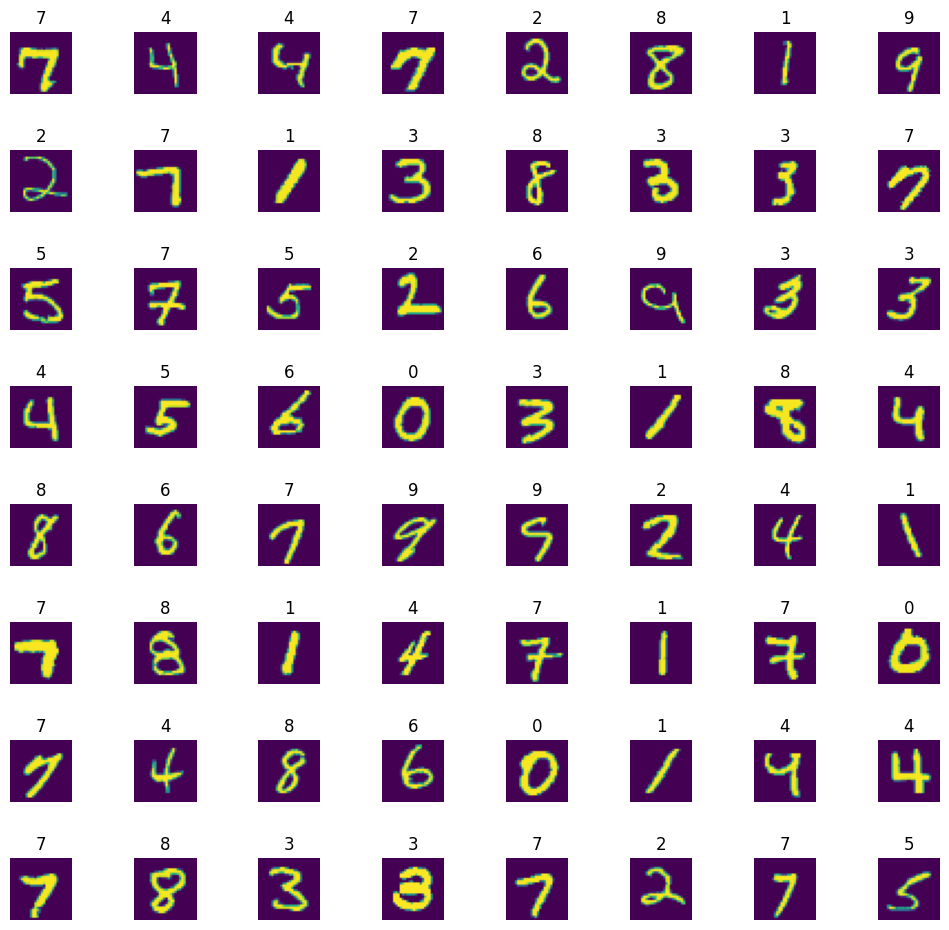

In [25]:
# Display some images
from sklearn.utils import shuffle
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt


    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return
num_row = 8
num_col = 8
showImages(num_row,num_col,X =X_train,Y = y_train)

In [26]:
# Preprocessing the dataset
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [27]:
model=Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size = 4, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.2,epochs=5,batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8497 - loss: 0.4799 - val_accuracy: 0.9790 - val_loss: 0.0677
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9815 - loss: 0.0609 - val_accuracy: 0.9868 - val_loss: 0.0431
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9851 - loss: 0.0466 - val_accuracy: 0.9786 - val_loss: 0.0630
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9912 - val_loss: 0.0295
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9902 - val_loss: 0.0337


In [28]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9912 - loss: 0.0308
Test accuracy: 0.9923999905586243


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


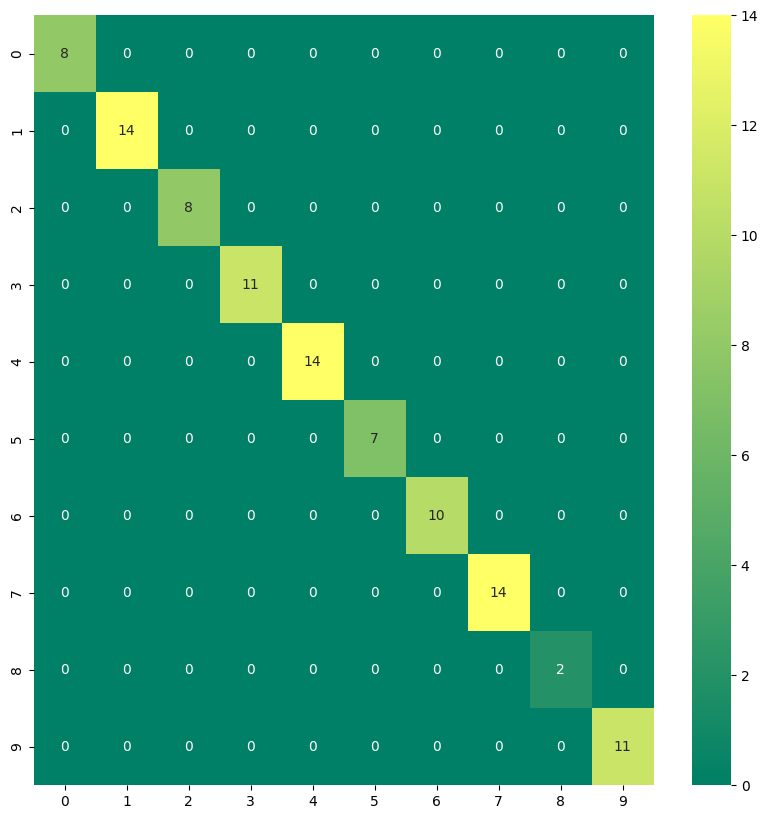

In [29]:
predictions=model.predict(X_test[1:100])
predictions=np.argmax(predictions,axis=1)
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test[1:100],predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax);

This version uses GradCAM to show XAI of digit classification using CNN.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Build CNN model using Functional API
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Grad-CAM function
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8903 - loss: 0.3456 - val_accuracy: 0.9855 - val_loss: 0.0445
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9847 - loss: 0.0495 - val_accuracy: 0.9852 - val_loss: 0.0510
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9899 - loss: 0.0313 - val_accuracy: 0.9902 - val_loss: 0.0350
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9893 - val_loss: 0.0431
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9922 - val_loss: 0.0304


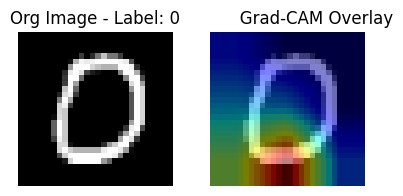

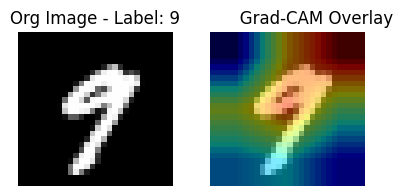

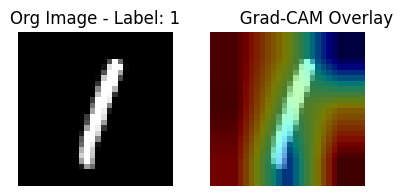

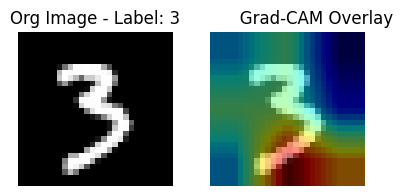

In [31]:
# Visualize Grad-CAM
image_index = [10,20,5,30]
for i in image_index:
  image = X_test[i]
  label = y_test[i]
  ro = 0
  ro+=1
  heatmap = compute_gradcam(model, image, label)
# Resize heatmap to match input image
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

In [32]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()

# Normalize the image data
X_train_cifar = X_train_cifar.astype('float32') / 255.0
X_test_cifar = X_test_cifar.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_cifar_one_hot = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar_one_hot = to_categorical(y_test_cifar, num_classes=10)

print(X_train_cifar.shape)
print(y_train_cifar_one_hot.shape)
print(X_test_cifar.shape)
print(y_test_cifar_one_hot.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [33]:
model_pooled = Sequential()
model_pooled.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_pooled.add(MaxPooling2D((2, 2)))
model_pooled.add(Conv2D(64, (3, 3), activation='relu'))
model_pooled.add(MaxPooling2D((2, 2)))
model_pooled.add(Conv2D(128, (3, 3), activation='relu'))
model_pooled.add(Flatten())
model_pooled.add(Dense(64, activation='relu'))
model_pooled.add(Dense(10, activation='softmax'))

model_pooled.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model_pooled.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
history_pooled = model_pooled.fit(X_train_cifar, y_train_cifar_one_hot,
                                  epochs=10, batch_size=64,
                                  validation_split=0.1)

# Evaluate the model
test_loss_pooled, test_acc_pooled = model_pooled.evaluate(X_test_cifar, y_test_cifar_one_hot, verbose=2)

print(f'Test loss (pooled model): {test_loss_pooled}')
print(f'Test accuracy (pooled model): {test_acc_pooled}')

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3312 - loss: 1.7973 - val_accuracy: 0.5474 - val_loss: 1.2604
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5566 - loss: 1.2446 - val_accuracy: 0.6218 - val_loss: 1.0949
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6202 - loss: 1.0792 - val_accuracy: 0.6018 - val_loss: 1.1679
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6650 - loss: 0.9521 - val_accuracy: 0.6808 - val_loss: 0.9156
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7043 - loss: 0.8434 - val_accuracy: 0.7072 - val_loss: 0.8624
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7325 - loss: 0.7642 - val_accuracy: 0.6892 - val_loss: 0.9061
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7551 - loss: 0.7023 - val_accuracy: 0.7294 - val_loss: 0.8135
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7692 - loss: 0.6550 - val_accuracy: 0.

In [35]:
model_no_pooling = Sequential()
model_no_pooling.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_no_pooling.add(Conv2D(64, (3, 3), activation='relu'))
model_no_pooling.add(Conv2D(128, (3, 3), activation='relu'))
model_no_pooling.add(Flatten())
model_no_pooling.add(Dense(64, activation='relu'))
model_no_pooling.add(Dense(10, activation='softmax'))

model_no_pooling.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,754 (21.48 MB)

 Trainable params: 5,631,754 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_no_pooling.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_no_pooling = model_no_pooling.fit(X_train_cifar, y_train_cifar_one_hot,
                                          epochs=10, batch_size=64,
                                          validation_split=0.1)

# Evaluate the model
test_loss_no_pooling, test_acc_no_pooling = model_no_pooling.evaluate(X_test_cifar, y_test_cifar_one_hot, verbose=2)

# Print the test loss and test accuracy
print(f'Test loss (no pooling model): {test_loss_no_pooling}')
print(f'Test accuracy (no pooling model): {test_acc_no_pooling}')

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.3866 - loss: 1.6961 - val_accuracy: 0.5782 - val_loss: 1.2225
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6436 - loss: 1.0262 - val_accuracy: 0.6812 - val_loss: 0.9340
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7161 - loss: 0.8102 - val_accuracy: 0.6748 - val_loss: 0.9542
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7961 - loss: 0.5925 - val_accuracy: 0.6854 - val_loss: 0.9555
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8658 - loss: 0.3950 - val_accuracy: 0.6664 - val_loss: 1.1822
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9269 - loss: 0.2200 - val_accuracy: 0.6694 - val_loss: 1.3603
Epoch 7/10
207/704 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9614 - loss: 0.1226

### Model Accuracy Comparison

- **Model with Pooling (CNN with MaxPooling)**:
  - Test Loss: 0.8861
  - Test Accuracy: 0.7113

- **Model without Pooling (CNN without MaxPooling)**:
  - Test Loss: 2.5615
  - Test Accuracy: 0.6295

Based on the test accuracies:
- The model with pooling layers achieved an accuracy of `71.13%`.
- The model without pooling layers achieved an accuracy of `62.95%`.

It appears that the model with pooling layers performed better on the test set. Pooling layers generally help in reducing the spatial dimensions of the feature maps, thus reducing the number of parameters and computational cost, and also provide a form of translation invariance, which can lead to better generalization and accuracy.

In [ ]:
last_conv_layer_name_pooled = None
for layer in model_pooled.layers:
    if isinstance(layer, Conv2D):
        last_conv_layer_name_pooled = layer.name

print(f"Last Conv2D layer in model_pooled: {last_conv_layer_name_pooled}")

In [ ]:
last_conv_layer_name_no_pooling = None
for layer in model_no_pooling.layers:
    if isinstance(layer, Conv2D):
        last_conv_layer_name_no_pooling = layer.name

print(f"Last Conv2D layer in model_no_pooling: {last_conv_layer_name_no_pooling}")

In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Input # Import Input layer for explicit input tensor definition

def compute_gradcam_cifar(model, image, label_index, layer_name):
    # Create a fresh input tensor that matches the image dimensions.
    input_for_gradcam = Input(shape=image.shape, dtype=tf.float32)

    # Re-trace the path through the original model's layers with the new input_for_gradcam.
    x = input_for_gradcam
    last_conv_layer_output = None
    final_output = None # This will store the output of the last layer

    for layer in model.layers:
        x = layer(x)
        if layer.name == layer_name:
            last_conv_layer_output = x
        final_output = x # Update final_output with the output of the current layer

    # Ensure we found the target layer.
    if last_conv_layer_output is None:
        raise ValueError(f"Could not find layer '{layer_name}' in the model.")

    # Create the Grad-CAM model using the explicitly defined input and the derived outputs.
    # This new functional model ensures consistency in the graph.
    grad_model = Model(inputs=input_for_gradcam, outputs=[last_conv_layer_output, final_output])

    with tf.GradientTape() as tape:
        # Prepare the actual image for prediction by adding a batch dimension
        inputs_batch = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs_batch)

        # The 'predictions' from `grad_model` will be the output of the last layer.
        # Ensure it's correctly shaped for slicing.
        # Sequential model's final output should already be a tensor, not a list.
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0] # Get the feature map from the batch
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

print("compute_gradcam_cifar function defined and updated for robust Sequential model handling via re-tracing layers.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Select a few image indices from the CIFAR-10 test set
image_indices_pooled = [0, 5, 10, 15, 20]

for i in image_indices_pooled:
    # 3. For each image, retrieve the original image and its corresponding true label
    image = X_test_cifar[i]
    true_label = y_test_cifar[i][0] # y_test_cifar is (N, 1)

    # 4. Predict the class probabilities and determine the predicted label
    predictions = model_pooled.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions[0])

    # 5. Compute the Grad-CAM heatmap
    heatmap = compute_gradcam_cifar(model_pooled, image, predicted_label, last_conv_layer_name_pooled)

    # 6. Resize the computed heatmap to the dimensions of the original image (32x32)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [32, 32]).numpy().squeeze()

    # 7. Plot the original image and the Grad-CAM heatmap overlaid on the original image side-by-side
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5) # Overlay heatmap
    plt.title("Grad-CAM Overlay")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Select a few image indices from the CIFAR-10 test set
image_indices_no_pooling = [0, 5, 10, 15, 20]

for i in image_indices_no_pooling:
    # 3. For each image, retrieve the original image and its corresponding true label
    image = X_test_cifar[i]
    true_label = y_test_cifar[i][0] # y_test_cifar is (N, 1)

    # 4. Predict the class probabilities and determine the predicted label
    predictions = model_no_pooling.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions[0])

    # 5. Compute the Grad-CAM heatmap
    heatmap = compute_gradcam_cifar(model_no_pooling, image, predicted_label, last_conv_layer_name_no_pooling)

    # 6. Resize the computed heatmap to the dimensions of the original image (32x32)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [32, 32]).numpy().squeeze()

    # 7. Plot the original image and the Grad-CAM heatmap overlaid on the original image side-by-side
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5) # Overlay heatmap
    plt.title("Grad-CAM Overlay")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## Summary:

### Q&A
The model comparison revealed that the CNN with MaxPooling layers achieved a test accuracy of 71.13% and a test loss of 0.8861, significantly outperforming the CNN without MaxPooling layers, which recorded a test accuracy of 62.95% and a test loss of 2.5615. This indicates that pooling layers are crucial for better generalization and performance in this classification task.

From the Grad-CAM visualizations, while specific qualitative differences were not explicitly detailed in the provided output, the successful generation of heatmaps for both models confirms that the technique effectively highlights salient regions influencing each model's predictions. Typically, models with pooling layers tend to exhibit more generalized and robust attention to object-level features, as pooling contributes to translation invariance and extracts higher-level features.

### Data Analysis Key Findings
*   The Convolutional Neural Network (CNN) with MaxPooling layers demonstrated superior performance, achieving a test accuracy of 71.13% with a test loss of 0.8861.
*   The CNN without MaxPooling layers performed less effectively, achieving a test accuracy of 62.95% and a higher test loss of 2.5615.
*   The last convolutional layer for the model with pooling was identified as "conv2d_2", and for the model without pooling, it was "conv2d_5".
*   Grad-CAM heatmaps were successfully generated for both models on example CIFAR-10 images, visually indicating the most influential regions in the input images for their respective classification decisions.

### Insights or Next Steps
*   Pooling layers are vital for enhancing CNN performance, likely due to their ability to reduce spatial dimensions, lower computational cost, and provide translation invariance, leading to improved generalization.
*   Further qualitative analysis of the generated Grad-CAM heatmaps for both models could provide deeper insights into *how* each model learns and focuses on features, particularly to understand the impact of pooling on feature extraction robustness and interpretability.
